<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/20-Kmeans-Clustering/KMeans_Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Color Quantization

## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

## The Image

array([[[101, 106, 112],
        [101, 106, 112],
        [101, 106, 112],
        ...,
        [161, 171, 183],
        [161, 171, 183],
        [161, 171, 183]],

       [[110, 115, 121],
        [110, 115, 121],
        [110, 115, 121],
        ...,
        [161, 171, 183],
        [161, 171, 183],
        [161, 171, 183]],

       [[107, 110, 119],
        [107, 110, 117],
        [107, 110, 119],
        ...,
        [161, 171, 183],
        [161, 171, 183],
        [161, 171, 183]],

       ...,

       [[101,  97,  88],
        [105, 101,  92],
        [107, 102,  96],
        ...,
        [ 58,  53,  50],
        [ 55,  50,  44],
        [ 54,  49,  45]],

       [[ 95,  90,  86],
        [ 97,  93,  84],
        [100,  95,  89],
        ...,
        [ 56,  51,  45],
        [ 54,  49,  46],
        [ 51,  46,  42]],

       [[ 95,  91,  82],
        [ 98,  93,  87],
        [ 99,  94,  88],
        ...,
        [ 69,  64,  61],
        [ 67,  62,  58],
        [ 64,  59,  55]]], dtype=uint8)
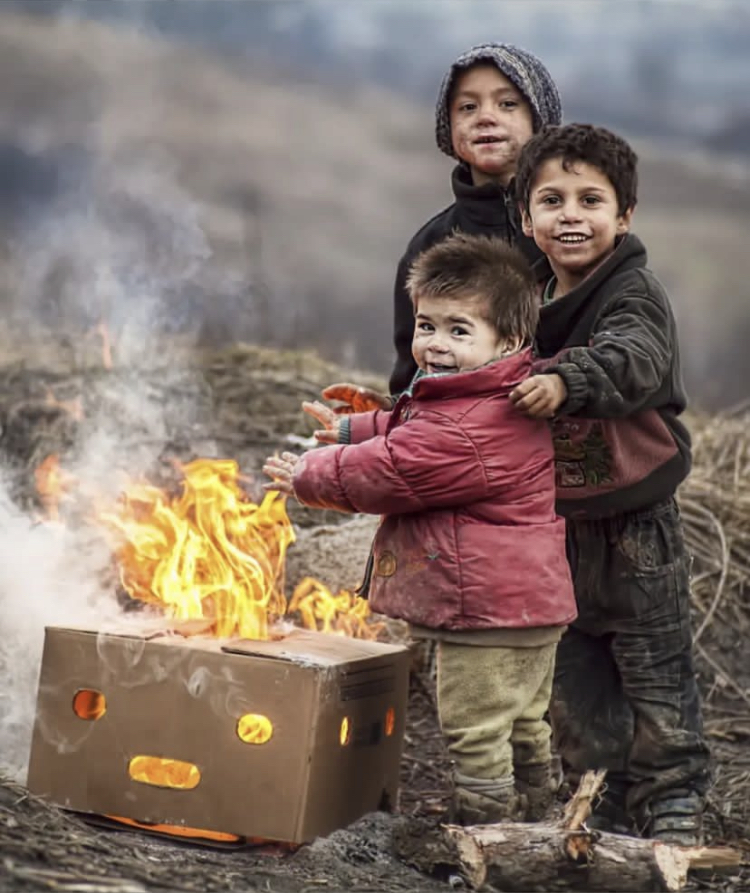

In [2]:
image_as_array = mpimg.imread('/content/20230325_114612000_iOS.jpg')
image_as_array

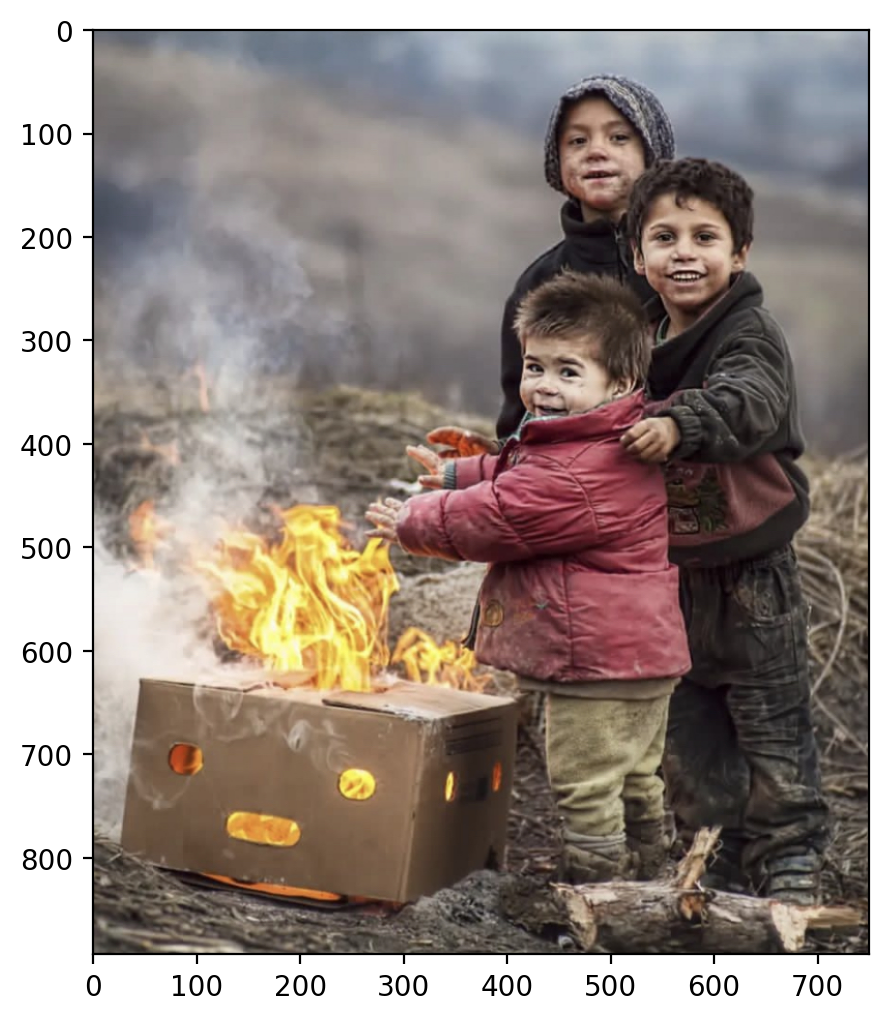

In [4]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(image_as_array)

## K-Means to Quantize Colors

In [5]:
image_as_array.shape

(893, 750, 3)

### From 3D to 2D

In [8]:
(h,w,c) = image_as_array.shape
image_as_array2D = image_as_array.reshape(h*w,c)

model = KMeans(n_clusters=7)
labels = model.fit_predict(image_as_array2D)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

In [11]:
model.cluster_centers_

array([[141.49999347, 133.26179692, 131.94563955],
       [ 44.76787356,  33.21562282,  31.94344636],
       [168.94975581, 162.5319565 , 160.83620548],
       [125.67011077, 101.26000182,  91.13120508],
       [226.33146185, 212.69022714, 191.8616424 ],
       [ 88.79699805,  68.35268221,  61.97678324],
       [227.26989086, 183.18424561,  95.56440057]])

In [12]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[141, 133, 132],
       [ 45,  33,  32],
       [169, 163, 161],
       [126, 101,  91],
       [226, 213, 192],
       [ 89,  68,  62],
       [227, 183,  96]])

In [13]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))
quantized_image

array([[[126, 101,  91],
        [126, 101,  91],
        [126, 101,  91],
        ...,
        [169, 163, 161],
        [169, 163, 161],
        [169, 163, 161]],

       [[126, 101,  91],
        [126, 101,  91],
        [126, 101,  91],
        ...,
        [169, 163, 161],
        [169, 163, 161],
        [169, 163, 161]],

       [[126, 101,  91],
        [126, 101,  91],
        [126, 101,  91],
        ...,
        [169, 163, 161],
        [169, 163, 161],
        [169, 163, 161]],

       ...,

       [[126, 101,  91],
        [126, 101,  91],
        [126, 101,  91],
        ...,
        [ 45,  33,  32],
        [ 45,  33,  32],
        [ 45,  33,  32]],

       [[ 89,  68,  62],
        [126, 101,  91],
        [126, 101,  91],
        ...,
        [ 45,  33,  32],
        [ 45,  33,  32],
        [ 45,  33,  32]],

       [[ 89,  68,  62],
        [126, 101,  91],
        [126, 101,  91],
        ...,
        [ 89,  68,  62],
        [ 89,  68,  62],
        [ 89,  68,  62]]

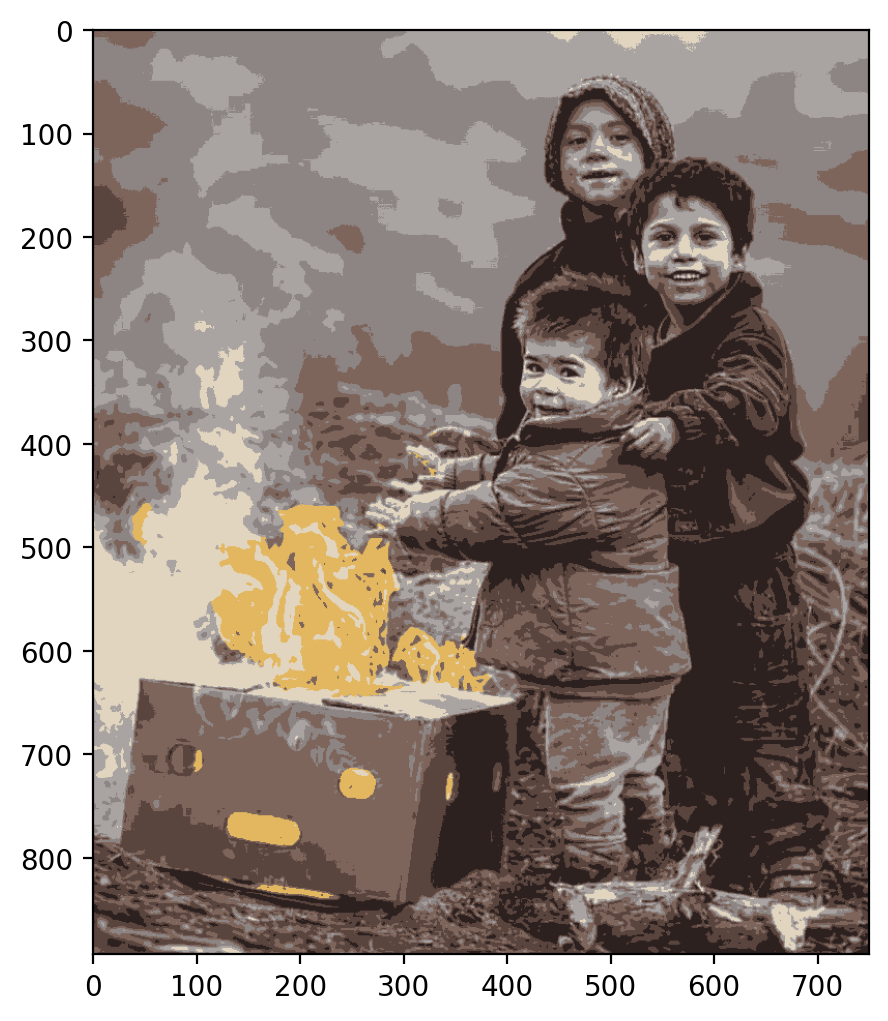

In [14]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(quantized_image)